# TEMAT №10 Szeregi czasowe (ang. time series)

 
 ### Czym są szeregi czasowe? 
 Szereg czasowy jest zbiorem obserwacji dokonywanych w równych odstępach czasu. 
 Służy do przewidywania przyszlych wartości w oparciu o poprzednie obserwacje, do których zalicza się;
 - prognozowania biznesowe (kursy walut, giełda...)
 - zrozumienia przeszlych zachowań i zaobserwowania przyszlych;
 - oszacowanie bieżących osiągnięć.
 
 Do analizy i prognozowania szeregów czasowych w Python stosowano bibliotekę  statsmodels.tsa.api, która zawiera modele i metody szeregów czasowych. Importowane kanonicznie przy użyciu importu statsmodels.tsa.api jako tsa.
API skupia się na modelach i najczęściej używanych testach statystycznych oraz narzędziach. Ścieżki importu i struktura wyjaśnia projekt dwóch modułów API i jak importowanie z API różni się od bezpośredniego importowania z modułu, w którym zdefiniowany jest model. Więcej informacji znajdziesz w dokumentacji https://www.statsmodels.org/stable/api.html. 
##### Podstawowe komponenty szeregów czasowych:
- trend
- sezonowość
- cykliczność
#### Co to jest Stacjonarność?
Szereg czasowy jest stacjonarny gdy z biegiem czasu zachowuje sie w sposów szczególny, istnieje bardzo duże prawdopodobieństwo, że w przyszlości będę postepować tak samo.
#### Sprawdzić szereg na stacjonarność można za pomocą:
- Rozszerzonego testu Dickeya-Fullera (ADF)
- Przekształcenia logarytmicznego (Box-Cox)
- Dekompozycji trendu sezonowego
- Usuwania trendów poprzez różnicowanie
- Naprawiania niestałej wariancji + usuwanie trendu.
#### Co wskazuje że szereg jest stacjonarnym:
- stała średnia;
- stala wariancja;
- autokowariancja jest niezależna od czasu.



## Czym jest autoregresja? 
Podstawowa koncepcja polega na tym, że prognozujemy interesujące szeregi czasowe y  zakładając, że mają one liniową zależność z innymi szeregami czasowymi x.
Autoregresja – to jest regresja statystyczna w której zmienna objaśniana jest przyszłą wartością ciągu, a zmienna objaśniająca to wartości ciągu czasowego z przeszłości. 
Zmienna prognozowana y jest nazywana także zależną lub objaśnianą. Zmienne predyktorów x są nazywane zmiennymi niezależnymi lub objaśniającymi.
Na przykład możemy prognozować miesięczną sprzedaż y, korzystając z całkowitych wydatków na reklamę x jako predyktora. Albo możemy prognozować dzienne zapotrzebowanie na energię elektryczną y używając temperatury x1 i dnia tygodnia x2 jako predyktorów.

###  Najczęściej stosowane modele statystyczne do prognozowania szeregów czasowych

#### - Wygładzanie wykładnicze 
Metoda obróbki szeregu czasowego zmniejszająca jego wariancję za pomocą ważonej średniej ruchomej z przeszłych wartości, o wagach malejących wykładniczo wraz z odległością w czasie. Stosowana do prostego usuwania szumu lub wizualizacji różnych danych. Jest również przydatna w prognozowaniu szeregów czasowych o niewielkim stosunku sygnału do szumu, szczególnie niemających wyraźnego trendu i wahań sezonowych.


#### - AR (model autoregresyjny)
Modele, w których bieżące wartości szeregu wyrażają się jako liniowe funkcje poprzednich obserwacji, nazywają się modelami autoregresji. Jeżeli bieżąca wartość ciągu xn zależy liniowo tylko od jednej poprzedniej wartości x_(n-1), to taki model jest modelem autoregresji pierwszego rzędu, co oznaczamy jako AR(1). Jeżeli bieżąca wartość ciągu xn zależy liniowo od p poprzednich wartości xn-1,…,xn-p, to taki model jest modelem autoregresji rzędu p, AR(p). 


#### - MA (model średniej ruchomej)
Proces ze średnią ruchomą, jest regresją liniową bieżącej wartości szeregów w odniesieniu do poprzednich wartości błędu, związanych z białym szumem lub przypadkowymi zaburzeniami. Zakłada się, że takie przypadkowe zaburzenia w każdym z punktów pochodzą z tego samego rozkładu, zwykle rozkładu normalnego z zerową wartością oczekiwaną i stałą wariancją. 


#### - ARMA (model autoregresji ze średnią ruchomą)-  obejmuje dwa proste modele ciągów czasowych AR oraz MA. 
Użyteczność modeli ARMA polega na ich oszczędnej reprezentacji. Podobnie jak w przypadku AR i MA, właściwości modeli ARMA można zwykle scharakteryzować za pomocą ich funkcji autokorelacji. Modele ARMA są używane do opisu stacjonarnych ciągów czasowych. Także niektóre rodzaje niestacjonarności można sprowadzać do procesów stacjonarnych przez tworzenie procesów różnic i dalej stosować np.  modele ARMA.


#### - ARIMA (zintegrowany model autoregresji ze średnią ruchomą)
jest złożony z następujących elementów: autoregresja (AR), całkowanie (I) oraz średnia ruchoma (MA). ARIMA jest formą analizy regresji, która mierzy siłę jednej zmiennej zależnej w stosunku do innych zmiennych. Model ten jest szeroko stosowany do prognozowania przyszłych wartości danych, badając różnice między wartościami w ciągach zamiast wartości oryginalnych. Modele zintegrowane służą do opisów procesów stochastycznych niestacjonarnych.
ARIMA z parametrami p, d i q, gdzie:
p - liczba opóźnień obserwacji w modelu.
d - stopień różnicy.
q - zakres średniej ruchomej.


## Dobór modelu

#### 1. Test ADF (rozszerzony test Dickeya-Fullera)
Dla sprawdzenia stacjonarności ciągu robimy analizę za pomocą rozszerzonego testu Dickeya Fullera (ADF). Przy analizie testu ADF warto zwrócić uwagę, że hipoteza zerowa wskazuje na istnienia niestacjonarności. Jeżeli obliczona wartość p jest mniejsza od zadanej alfa, to ta hipoteza zerowa zostaje odrzucona, a ciąg  jest stacjonarny. W przeciwnym razie dane są niestacjonarne.

#### 2. ACF i PACF 

Autokorelacja i autokorelacja cząstkowa to miary związków między bieżącymi i przeszłymi wartościami szeregów określające, które przeszłe wartości szeregów są najbardziej użyteczne przy przewidywaniu przyszłych wartości. Dzięki tej wiedzy można określić kolejność procesów w modelu ARIMA. Dokładniej rzecz ujmując:

##### Funkcja autokorelacji (ACF).
Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie.
Występuje wtedy, gdy skutki działania zmienności losowej nie wygasają w danym okresie t, lecz są przenoszone na okresy przyszłe. 
plot_acf()
http://drizzt.home.amu.edu.pl/images/DADA/W7.pdf

##### Funkcja autokorelacji cząstkowej (PACF). 
jak sama nazwa wskazuje, PACF jest podzbiorem funkcji autokorelacji (ACF). Przy przesunięciu k jest to korelacja między wartościami szeregu oddalonymi o k przedziałów od siebie, z jednoczesną rejestracją wartości z przedziałów znajdujących się pomiędzy.
ACF i PACF stosowane są do wyboru rzędu modeli.  PACF pokazuje zależność między xn a poprzednimi wartościami, pomijając wpływ pośrednich opóźnień.
plot_pacf()

Oś x wykresu ACF wskazuje przesunięcie, dla jakiego obliczana jest autokorelacja; oś y wskazuje wartość korelacji (między −1 a 1). Na przykład linia rzutowania przy przesunięciu wynoszącym 1 na wykresie ACF oznacza silną korelację między każdą wartością szeregu a wartością poprzedzającą, zaś linia rzutowania przy przesunięciu wynoszącym 2 oznacza silną korelację między każdą wartością a wartością występującą dwa punkty wcześniej itd.
Korelacja dodatnia oznacza, że duże wartości bieżące odpowiadają dużym wartościom dla danego przesunięcia; ujemna korelacja oznacza, że duże wartości bieżące odpowiadają niewielkim wartościom dla danego przesunięcia.
Wartość bezwzględna korelacji stanowi miarę siły powiązania, przy czym większe wartości bezwzględne oznaczają silniejsze relacje.

#### 3. AIC (kryterium informacyjne Akaikego)
jest estymatorem błędu predykcji w próbie, a tym samym względnej jakości modeli statystycznych dla danego zbioru danych. Jest to jeden ze wskaźników dopasowania modelu, który stosuje się do wyznaczenia miary jakości modeli statystycznych dla badanego zbioru danych. To jak błąd średniokwadratowy w autoregresji — im mniejsza liczba, tym lepiej jest dopasowany model. Na ogół model o większej liczbie predyktorów (parametrów) daje dokładniejsze przewidywania, ponadto ma większą skłonność do przeuczenia. Kryteria informacyjne są nazywane metodami porównywania modeli dla zmiennej zależnej, i stosowane są do wyboru najlepszego modelu.



## Biblioteki

- pip install numpy scipy scikit-learn  #--- to the anaconda terminal
- pip install --user pmdarima   #---installing auto-arima
- pip install -U statsmodels   #---instaling  statsmodels
- import pandas as pd
- from pandas import DataFrame
- import datetime 
- from matplotlib import pyplot
- import matplotlib.pyplot as plt
- from statsmodels.tsa.stattools import adfuller
- from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
- from statsmodels.tsa.arima.model import ARIMA
- import pmdarima as pm
- from pmdarima import model_selection
- import numpy as np
- %matplotlib inline


# Zadanie do ćwiczenia   
### Na podstawie danych zawartych w pliku analiza.csv wykonaj następne punkty:
#### 1) Zaimportój niezbędne biblioteki do szeregów czasowych (https://www.statsmodels.org/stable/api.html), a także biblioteki do operacji na danych oraz tworzenia wykresów.
#### 2) Odczytaj dane z pliku analiza.csv. Pomocne w interpretacji danych są metody: head(), describe(), len(), shape.
#### 3) Wykonaj wstępny wykres uzyskanych danych (typu "scatter") https://miroslawmamczur.pl/006-wykres-rozrzutu-scatter-plot/
#### 4) Oblicz ADF (p-value, 'ADF Statistic)
#### 5) Wykonaj wykres ACF
#### 6) Wykonaj wykres PACF
#### 7) Podzieł szereg na dane na treningowe i testowe oraz oblicz kryterium  AIC dla modelu ARIMA (3,0.1) (results.summary())
#### 8) Za pomocą funkcji AUTO-ARIMA dobierz najlepszy model dla prognozy.
#### 9) Zrób wykreś do prognozy
#### 10) Wnioski

# Rozwiązanie 

###  1) Zaimportój niezbędne biblioteki do szeregów czasowych a także biblioteki do operacji na danych oraz tworzenia wykresów


In [1]:
import pandas as pd
# import datetime
import matplotlib.pyplot as plt
import pmdarima as pm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# from pmdarima import model_selection

%matplotlib inline

### 2) Odczytaj dane z pliku analiza.csv. Pomocne w interpretacji danych są metody: head(), describe(), len(), shape.


In [2]:
df = pd.read_csv("analiza.csv", decimal=",")
print(f"Wymiar danych: {df.shape}")
df.head(n=7)

Wymiar danych: (144, 2)


,Data,Rezerwacja
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148


In [3]:
df.describe()

,Rezerwacja
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### 3) Wykonaj wstępny wykres uzyskanych danych 


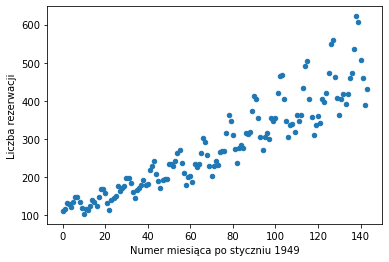

In [16]:
y = df[['Rezerwacja']]
df.reset_index().plot.scatter(x="index", y="Rezerwacja")
plt.xlabel("Numer miesiąca po styczniu 1949")
plt.ylabel("Liczba rezerwacji")
plt.show()

### 4) Oblicz ADF

In [5]:
#ADF rozszerzony Test Dickeya-Fullera dla sprawdzenia stacjonarności

df2 = pd.read_csv("analiza.csv", header=0, index_col=0)
result = adfuller(df2.values)
print(f"Test stacjonarności: {result[1]}")
print(f"Wartość p: {result[0]}")
 
    
    # p-value, wartość krytyczna

Test stacjonarności: 0.9918802434376409
Wartość p: 0.8153688792060433


### 5) Wykonaj wykres ACF


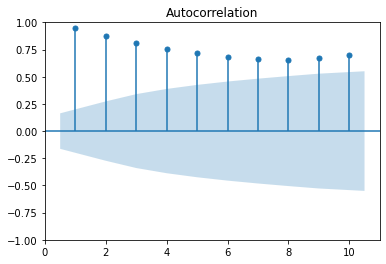

In [6]:
#ACF wykres funkcji autokorelacji 

plot_acf(df2, zero=False, lags=10)
plt.show()


### 6) Wykonaj wykres PACF


/home/user/anaconda3/envs/arturmzyk/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


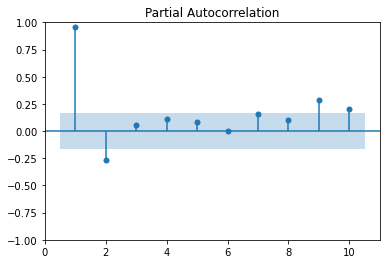

In [7]:
#PACF - wykres częsciowej funkcji autokorelacji

plot_pacf(df2, zero=False, lags=10)
plt.show()

### 7) Podzieł szereg na dane treningowe i testowe wędlug uznania oraz oblicz kryterium  AIC dla modelu ARIMA (3,0,1) (results.summary())

In [8]:
#ARIMA

X = df2.values
train = X[0 : 106] # dane treningowe
test = X[106:]  # dane testowe
predictions = [train, test]
model = ARIMA(df2, order=(3, 0, 1))
results = model.fit()
print(results.summary())

/home/user/anaconda3/envs/arturmzyk/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/user/anaconda3/envs/arturmzyk/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/user/anaconda3/envs/arturmzyk/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:             Rezerwacja   No. Observations:                  144
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -698.144
Date:                Fri, 10 Dec 2021   AIC                           1408.288
Time:                        11:31:30   BIC                           1426.107
Sample:                    01-01-1949   HQIC                          1415.528
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.3011     58.857      4.762      0.000     164.944     395.658
ar.L1          0.5019      0.133      3.776      0.000       0.241       0.762
ar.L2          0.5505      0.157      3.506      0.0

### 8) Za pomocą funkcji AUTO-ARIMA dobierz najlepszy model dla prognozy.

In [9]:
#AUTO-ARIMA

auto_arima = pm.auto_arima(df2, exogenous=None, seasonal=False, m=1, d=1, D=1, max_p=4, max_q=3, trace=True,
                           error_action="ignore", suppress_warning=True)
print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

### 9) Wykonaj wykres prognozy

In [11]:
# auto_arima.plot_diagnostics(figsize=(7, 5))
# plt.show()

In [12]:
# import statsmodels.api as sm
# model = sm.tsa.statespace.SARIMAX(y, order=(4, 1, 3))
# res = model.fit(disp=False)

predictions = results.predict(start=106)
predictions


1957-11-01    332.119229
1957-12-01    288.631915
1958-01-01    355.440292
1958-02-01    323.791947
1958-03-01    319.476269
1958-04-01    372.233685
1958-05-01    332.504842
1958-06-01    375.536755
1958-07-01    447.763931
1958-08-01    498.957332
1958-09-01    493.879254
1958-10-01    357.442316
1958-11-01    359.375428
1958-12-01    277.792919
1959-01-01    367.711465
1959-02-01    340.643621
1959-03-01    348.806428
1959-04-01    418.017393
1959-05-01    379.607648
1959-06-01    433.582298
1959-07-01    472.451778
1959-08-01    569.313487
1959-09-01    532.767558
1959-10-01    427.221798
1959-11-01    389.228072
1959-12-01    342.315316
1960-01-01    427.191459
1960-02-01    397.536757
1960-03-01    388.646273
1960-04-01    419.863517
1960-05-01    469.483863
1960-06-01    459.771475
1960-07-01    557.044622
1960-08-01    624.712428
1960-09-01    581.173802
1960-10-01    462.773484
1960-11-01    451.383818
1960-12-01    349.480170
Freq: MS, Name: predicted_mean, dtype: float64

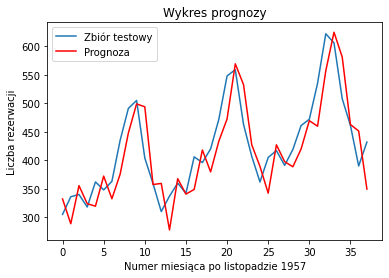

In [19]:
plt.plot(test)
plt.plot([*range(len(predictions))], predictions, color="red")
plt.title("Wykres prognozy")
plt.xlabel("Numer miesiąca po listopadzie 1957")
plt.ylabel("Liczba rezerwacji")
plt.legend(["Zbiór testowy", "Prognoza"])
plt.show()

### 10) Wnioski

Wykres prognozy niemalże pokrywa się z z wykresem zbioru testowego. Predykcje są bardzo poprawne.